To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_2020/blob/master/Homeworks/HW%202.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

# Part I: Conceptual exercises

**1. Label each case as describing either data mining (DM), or the use of the results of data mining (Use).**

a) Choose customers who are most likely to respond to an on-line ad. (USE)

b) Discover rules that indicate when an account has been defrauded. (DM)

c) Find patterns indicating what customer behavior is more likely to lead to response to an on-line ad. (DM)

d) Estimate probability of default for a credit application. (USE)

e) Predict whether a customer is pregnant. (USE)


**2)  Plumbing Inc. has been selling plumbing supplies for the last 20 years. The owner, Joe, decides that next year it is finally time to diversify by adding gardening tools to his products. Having had success using customer data to build predictive models to guide direct mail campaigns for special plumbing offers, he considers that data mining could help him to identify a subset of customers who should be good prospects for his new set of products. Is Joe ready to solve this as a supervised learning problem? If yes – what would you suggest as the target variable?  If no  - why not?  What would you recommend that Joe do to achieve his business goal? **

No. Since he does not have the data for people who are interested in buying his gardening tools, therefore cannot create a supervised learning without labeled data. 

Currently, he could only identify the subset of customers who respnose to his direct mail (though without level of interest in gardeninig products). He could collect more data on potential customers' level of interest in gardening  tools and test some pilot direct mail promotion programes to collect data for further training and analysis.

---



# Part II: Predicting Show-Up

The purpose of this part of the homework is to get you up to speed with data manipulation and model fitting using Python. Ideally, you should be able to start working on your term project after finishing this.

### Background

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

In [67]:
#If opening in colab run this cell
!git clone https://github.com/bwolfson2/foster_2020
%cd foster_2020/Homeworks/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the data containing past appointments (Remember to change this to the specific path of your data).
data_path = "./data/data-hw2.csv" 

Cloning into 'foster_2020'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 243 (delta 31), reused 115 (delta 12), pack-reused 109
Receiving objects: 100% (243/243), 58.58 MiB | 12.33 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Checking out files: 100% (114/114), done.
/content/foster_2020/Homeworks/foster_2020/Homeworks/foster_2020/Homeworks/foster_2020/Homeworks/foster_2020/Homeworks/foster_2020/Homeworks/foster_2020/Homeworks


### Loading the data

** 1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and show the first few rows in the dataset. ** 

In [68]:
# Put your answer here
df = pd.read_csv(data_path)
count_rows = df.shape[0]
count_columns = df.shape[1]
#df.shape
print ("There are",count_rows,"rows and",count_columns,"columns")
df.head()

There are 110527 rows and 14 columns


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here's a brief summary of the variables you should see:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female. 
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor. 
7. Age = How old is the patient. 
8. Neighborhood - Place where the patient lives. 
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

** 2. Check out if there are any Na or NaN values. Drop all the observations that include such values in any of the columns. ** 

In [69]:
# Put your answer here
Check_NaN = df.isnull().sum()
print(Check_NaN)

cleaned_df = df.dropna()
cleaned_df.head()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Dealing with dates

** 3. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this). **

In [71]:
cleaned_df['ScheduledDay'] = pd.to_datetime(cleaned_df['ScheduledDay'])
cleaned_df['AppointmentDay'] = pd.to_datetime(cleaned_df['AppointmentDay'])
#cleaned_df['AppointmentDay'] = cleaned_df['AppointmentDay'].apply(pd.to_datetime)
cleaned_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


** 4. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, "normalize" ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method. **

In [73]:
cleaned_df['ScheduledDay'] = pd.DatetimeIndex(cleaned_df['ScheduledDay']).normalize()
cleaned_df['AppointmentDay'] = pd.DatetimeIndex(cleaned_df['AppointmentDay']).normalize()
cleaned_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


** 5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field includes only integers (and not TimeDelta, which is the difference between two datetimes).**

In [76]:
# Put your answer here
cleaned_df['TimeInAdvance'] = (cleaned_df.ScheduledDay-cleaned_df.AppointmentDay).dt.days
cleaned_df['TimeInAdvance']=cleaned_df['TimeInAdvance'].astype(int)
cleaned_df.head(20)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598510e+13,5626772,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,-2
6,7.336880e+14,5630279,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,-2
7,3.449830e+12,5630575,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,-2
8,5.639470e+13,5638447,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,7.812460e+13,5629123,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,-2


There are many other features you may want to extract from date variables, such as the time at which the appointment was schedule, the day of the week, the month, etc. However, we will only use TimeInAdvance for the purposes of this homework.

### Cleaning data

**6. Use the "describe" command from pandas to obtain some general stats about the data (in case you forgot about it, take a look at the 'Dealing with data' notebook in Module 1). Do you see any weird values in any of the columns? Remove all observations that include "weird" or wrong values and comment on why did you remove such observations. Also, print the number of observations you removed. **

In [77]:
# Put your answer here
cleaned_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,-10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-179.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.000000


In [79]:
#drop negative age. It is impossible for people to have negative age.
to_delete_1 = cleaned_df[cleaned_df['Age'] < 0 ].index
cleaned_df.drop(to_delete_1, inplace=True)

#drop patient age>100. Based on common sense, 115 is a very likely age to achieve, with mean being 37 and SD being 23. >100 could be regard as outliers and removed.

to_delete_2 = cleaned_df[cleaned_df['Age'] >100 ].index
cleaned_df.drop(to_delete_2, inplace=True)

count_rows_new = cleaned_df.shape[0]
deleted_rows = count_rows - count_rows_new 
print(deleted_rows, "rows are deleted")

cleaned_df.head()

8 rows are deleted


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


### Dealing with binary variables

** 7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Make sure to also drop the Gender column.  **

In [80]:
cleaned_df['IsFemale'] = np.where(cleaned_df['Gender']=='F',1,0)
del cleaned_df['Gender']
cleaned_df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1


** 8. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise. **

In [81]:
# Put your answer here
cleaned_df['Noshow'] = np.where(cleaned_df['No-show']=='Yes',1,0)
del cleaned_df['No-show']
cleaned_df.head()


,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,Noshow
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,0


In [82]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110519 non-null float64
AppointmentID     110519 non-null int64
ScheduledDay      110519 non-null datetime64[ns, UTC]
AppointmentDay    110519 non-null datetime64[ns, UTC]
Age               110519 non-null int64
Neighborhood      110519 non-null object
Scholarship       110519 non-null int64
Hypertension      110519 non-null int64
Diabetes          110519 non-null int64
Alcoholism        110519 non-null int64
Handicap          110519 non-null int64
SMS_received      110519 non-null int64
TimeInAdvance     110519 non-null int64
IsFemale          110519 non-null int64
Noshow            110519 non-null int64
dtypes: datetime64[ns, UTC](2), float64(1), int64(11), object(1)
memory usage: 13.5+ MB


### Dealing with categorical variables

** 9. Let's take a look at the Neighbordhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?  ** 

In [83]:
# Put your answer here
neighborhood_df = cleaned_df['Neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='Count')
print(neighborhood_df.head())
print(neighborhood_df.tail())
print("There are total",neighborhood_df["Neighborhood"].count(),"Neighborhoods")

      Neighborhood  Count
0   JARDIM CAMBURI   7717
1      MARIA ORTIZ   5804
2      RESISTÊNCIA   4431
3  JARDIM DA PENHA   3877
4          ITARARÉ   3514
                   Neighborhood  Count
76                  ILHA DO BOI     35
77                ILHA DO FRADE     10
78                    AEROPORTO      8
79  ILHAS OCEÂNICAS DE TRINDADE      2
80            PARQUE INDUSTRIAL      1
There are total 81 Neighborhoods


** 10. (Optional, extra points) We often group together categories that are very rare because it's hard to genearlize from them. Find the neighborhoods that appear less than 500 times in the dataset and replace their name with "OTHER". **

In [84]:
# Put your (optional) answer here

cleaned_df = cleaned_df.merge(neighborhood_df, on="Neighborhood", how="right")
cleaned_df.head()

cleaned_df['Neighborhood'] = np.where(cleaned_df['Count']<500,"OTHERS",cleaned_df['Neighborhood'])
del cleaned_df['Count']
cleaned_df.head(30)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,Noshow
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0
2,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,0
3,5.434180e+12,5552915,2016-04-06 00:00:00+00:00,2016-04-29 00:00:00+00:00,69,JARDIM DA PENHA,0,1,0,0,0,1,-23,1,0
4,2.817980e+13,5642697,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0
5,2.436160e+13,5615523,2016-04-25 00:00:00+00:00,2016-04-29 00:00:00+00:00,30,JARDIM DA PENHA,0,0,0,0,0,0,-4,0,1
6,3.382870e+12,5634164,2016-04-28 00:00:00+00:00,2016-04-29 00:00:00+00:00,7,JARDIM DA PENHA,0,0,0,0,0,0,-1,1,1
7,2.133890e+14,5629193,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,38,JARDIM DA PENHA,0,0,0,0,0,0,-2,1,0
8,5.255360e+12,5629183,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,19,JARDIM DA PENHA,0,0,0,0,0,0,-2,1,0
9,9.777440e+13,5629182,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,61,JARDIM DA PENHA,0,0,0,0,0,0,-2,1,0


** 11. Get dummy/indicator variables for each neighborhood and add them to the dataframe. Hint: Take a look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method. Make sure to also drop the Neighborhood column. **

In [85]:
# Put your answer here
pd.get_dummies(cleaned_df.Neighborhood)
cleaned_df = cleaned_df.join(pd.get_dummies(cleaned_df.Neighborhood))
cleaned_df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,Noshow,ANDORINHAS,BELA VISTA,BENTO FERREIRA,BONFIM,CARATOÍRA,CENTRO,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DO CABRAL,DO QUADRO,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO PRÍNCIPE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,NOVA PALESTINA,OTHERS,PARQUE MOSCOSO,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CLARA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.434180e+12,5552915,2016-04-06 00:00:00+00:00,2016-04-29 00:00:00+00:00,69,JARDIM DA PENHA,0,1,0,0,0,1,-23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.817980e+13,5642697,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
del cleaned_df['Neighborhood']
cleaned_df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,Noshow,ANDORINHAS,BELA VISTA,BENTO FERREIRA,BONFIM,CARATOÍRA,CENTRO,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DO CABRAL,DO QUADRO,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO PRÍNCIPE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,NOVA PALESTINA,OTHERS,PARQUE MOSCOSO,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CLARA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.434180e+12,5552915,2016-04-06 00:00:00+00:00,2016-04-29 00:00:00+00:00,69,0,1,0,0,0,1,-23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.817980e+13,5642697,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dealing with panel data

** 12. Let's take a look at the PatientsId column. How many patients have made more than one appointment?  **

In [87]:
# Put your answer here
PatientsId_df = cleaned_df['PatientId'].value_counts().rename_axis('PatientsId').reset_index(name='Patient_Count')
PatientsId_df.head()

,PatientsId,Patient_Count
0,8.221460e+14,88
1,9.963767e+10,84
2,2.688610e+13,70
3,3.353480e+13,65
4,6.264200e+12,62


In [88]:
print(PatientsId_df[PatientsId_df['Patient_Count']>1].count())

PatientsId       24494
Patient_Count    24494
dtype: int64


As you can see, there are many patients that have made more than one appointment. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our particuclar case, such data may help us to make better predictions. For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. That being said, taking advantage of panel data often requires additional data processing. The following exercise is **optional** and relatively advanced, so feel free to ignore it. 

** 13. (Optional, extra points) Create a new column called "PreviousNoShows" that for each appointment includes the number of past appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). Hint: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable. All of these things can be done using pandas. **

In [89]:
# Put your (optional) answer here
cleaned_df_optional= cleaned_df.sort_values(['PatientId', 'ScheduledDay'], ascending = (True, True))
cleaned_df_optional['PreviousNoShow'] = cleaned_df_optional.groupby(['PatientId'])['Noshow'].apply(lambda x: x.cumsum())
cleaned_df_optional.head(50)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,Noshow,ANDORINHAS,BELA VISTA,BENTO FERREIRA,BONFIM,CARATOÍRA,CENTRO,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DO CABRAL,DO QUADRO,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO PRÍNCIPE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,NOVA PALESTINA,OTHERS,PARQUE MOSCOSO,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CLARA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM,PreviousNoShow
66709,39200.0,5751990,2016-05-31 00:00:00+00:00,2016-06-03 00:00:00+00:00,44,0,0,0,0,0,0,-3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49646,43700.0,5760144,2016-06-01 00:00:00+00:00,2016-06-01 00:00:00+00:00,39,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75906,93800.0,5712759,2016-05-18 00:00:00+00:00,2016-05-18 00:00:00+00:00,33,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94024,142000.0,5637648,2016-04-29 00:00:00+00:00,2016-05-02 00:00:00+00:00,12,0,0,0,0,0,0,-3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94002,538000.0,5637728,2016-04-29 00:00:00+00:00,2016-05-06 00:00:00+00:00,14,0,0,0,0,0,1,-7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79656,5628261.0,5680449,2016-05-10 00:00:00+00:00,2016-05-13 00:00:00+00:00,13,0,0,0,0,0,0,-3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
62013,11831856.0,5718578,2016-05-19 00:00:00+00:00,2016-05-19 00:00:00+00:00,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
71146,22638656.0,5580835,2016-04-14 00:00:00+00:00,2016-05-03 00:00:00+00:00,22,0,0,0,0,0,1,-19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71399,22638656.0,5715081,2016-05-18 00:00:00+00:00,2016-06-08 00:00:00+00:00,23,0,0,0,0,0,1,-21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1820,52168938.0,5607220,2016-04-20 00:00:00+00:00,2016-05-17 00:00:00+00:00,28,0,0,0,0,0,0,-27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There are many other features we could compute with this data set, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the purposes of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**14. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay. **

In [90]:
# Put your answer here
del cleaned_df['PatientId']
del cleaned_df['AppointmentID']
del cleaned_df['ScheduledDay']
del cleaned_df['AppointmentDay']
cleaned_df.head()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,Noshow,ANDORINHAS,BELA VISTA,BENTO FERREIRA,BONFIM,CARATOÍRA,CENTRO,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,DO CABRAL,DO QUADRO,ESTRELINHA,FONTE GRANDE,FORTE SÃO JOÃO,GOIABEIRAS,GRANDE VITÓRIA,GURIGICA,ILHA DAS CAIEIRAS,ILHA DE SANTA MARIA,ILHA DO PRÍNCIPE,INHANGUETÁ,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,JOANA D´ARC,JUCUTUQUARA,MARIA ORTIZ,MARUÍPE,MATA DA PRAIA,MONTE BELO,NOVA PALESTINA,OTHERS,PARQUE MOSCOSO,PRAIA DO CANTO,PRAIA DO SUÁ,REDENÇÃO,REPÚBLICA,RESISTÊNCIA,ROMÃO,SANTA CLARA,SANTA MARTHA,SANTA TEREZA,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM
0,62,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,56,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,69,0,1,0,0,0,1,-23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110518
Data columns (total 65 columns):
Age                    110519 non-null int64
Scholarship            110519 non-null int64
Hypertension           110519 non-null int64
Diabetes               110519 non-null int64
Alcoholism             110519 non-null int64
Handicap               110519 non-null int64
SMS_received           110519 non-null int64
TimeInAdvance          110519 non-null int64
IsFemale               110519 non-null int64
Noshow                 110519 non-null int64
ANDORINHAS             110519 non-null uint8
BELA VISTA             110519 non-null uint8
BENTO FERREIRA         110519 non-null uint8
BONFIM                 110519 non-null uint8
CARATOÍRA              110519 non-null uint8
CENTRO                 110519 non-null uint8
CONQUISTA              110519 non-null uint8
CONSOLAÇÃO             110519 non-null uint8
CRUZAMENTO             110519 non-null uint8
DA PENHA               110519 non-

### Predictive modeling

** 15. Let's build a model to predict if someone will not show up using a DecisionTreeClassifier. Report the training accuracy and the cross-validated accuracy using 5 folds. **

In [92]:
# Put your answer here
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#column_names = cleaned_df.columns
#predictor_columns = column_names.pop('Noshow')
X = cleaned_df.drop(columns =['Noshow'])
Y = cleaned_df['Noshow']

# Set randomness so that we all get the same answer
np.random.seed(42)
shuffled_df = cleaned_df.sample(frac=1)
X = shuffled_df.drop(columns =['Noshow'])
Y = shuffled_df['Noshow']
# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, Y_train)

print ( "Accuracy on training = %.4f" % accuracy_score(model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % accuracy_score(model.predict(X_test), Y_test) )




Accuracy on training = 0.8056
Accuracy on test = 0.7944


** 16. As discussed in class, one way to control the complexity of a decision tree is by enforcing that at least some minimum number of examples from the training set populate each leaf. This is set with the min_samples_leaf parameter. Try values for min_samples_leaf ranging from 1 to 4096 by doubling the number of samples (i.e., 1, 2, 4, 8, ..., 4096). For each value, compute the training accuracy and the cross-validated accuracy. Use the results to plot fitting curves and explain what they show. What do you think is the most appropriate value for min_samples_leaf for this problem? ** 

In [137]:
# Put your answer here
# Put your answer here
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#column_names = cleaned_df.columns
#predictor_columns = column_names.pop('Noshow')
X = cleaned_df.drop(columns =['Noshow'])
Y = cleaned_df['Noshow']

# Set randomness so that we all get the same answer
np.random.seed(42)
shuffled_df = cleaned_df.sample(frac=1)
X = shuffled_df.drop(columns =['Noshow'])
Y = shuffled_df['Noshow']
# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

training_acc = list()
test_acc = list()
n = 1

while n <= 4096:
  model = DecisionTreeClassifier(min_samples_leaf=n)
  model.fit(X_train, Y_train)
  print ( "while min samples leaf =", n, "the acccuracy are as follows:")
  print ( "Accuracy on training = %.4f" % accuracy_score(model.predict(X_train), Y_train) )
  print ( "Accuracy on test = %.4f" % accuracy_score(model.predict(X_test), Y_test) )
  training_acc.append(float(accuracy_score(model.predict(X_train), Y_train)))
  test_acc.append(float(accuracy_score(model.predict(X_test), Y_test)))
  n = 2*n

print (training_acc)
print (test_acc)









while min samples leaf = 1 the acccuracy are as follows:
Accuracy on training = 0.9628
Accuracy on test = 0.7410
while min samples leaf = 2 the acccuracy are as follows:
Accuracy on training = 0.8911
Accuracy on test = 0.7555
while min samples leaf = 4 the acccuracy are as follows:
Accuracy on training = 0.8539
Accuracy on test = 0.7629
while min samples leaf = 8 the acccuracy are as follows:
Accuracy on training = 0.8283
Accuracy on test = 0.7720
while min samples leaf = 16 the acccuracy are as follows:
Accuracy on training = 0.8127
Accuracy on test = 0.7808
while min samples leaf = 32 the acccuracy are as follows:
Accuracy on training = 0.8058
Accuracy on test = 0.7891
while min samples leaf = 64 the acccuracy are as follows:
Accuracy on training = 0.8021
Accuracy on test = 0.7929
while min samples leaf = 128 the acccuracy are as follows:
Accuracy on training = 0.7999
Accuracy on test = 0.7930
while min samples leaf = 256 the acccuracy are as follows:
Accuracy on training = 0.7990
Ac

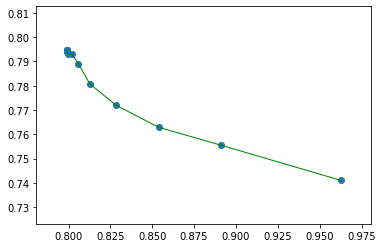

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

x_point = training_acc
y_point = test_acc
plt.scatter(x_point, y_point)
ys = lowess(x_point, y_point)
_ = plt.plot(x_point, y_point,'green',linewidth=1)


** 17. (Optional, extra points) Do you think the accuracy of the model you built is good or not? Why? What other addititonal information would be useful to evaluate whether the model is any good? How would you use that information to evaluate the model? **

In [0]:
# Put your (optional) answer here (use 'markdown' rather than 'code').

Doesn't look very good at current stage. Since while restricting the min leaf number, the accuracy is less than 0.8 for both training and testing. 

Could run a linear model and see the accuracy for linear model. If our model's accuracy is similar to the linear one, then it is not a good one.